#Google [Colaboratory](https://research.google.com/colaboratory/faq.html)                           power by ![Google](https://www.google.com/images/logos/google_logo_41.png) 

In [ ]:
# Mount Google Drive to get data.
#from google.colab import drive
#drive.mount('/content/drive')

# Delete sample data if exists.
!if [ -d "/content/sample_data" ]; then rm -Rf /content/sample_data; fi

# Plot Sample Model 

**Model Function ---**

In [1]:
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/Model
from tensorflow.keras import Model
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/layers
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Dense,Flatten
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
from tensorflow.keras import Sequential
# Source:https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def buildModel(input_shape_r=(224,224,3),classes=2,dropout_rate=0.10,
               clf_activator=None,mdl_name='keras_CC_2_v1_0'):
    
    modelx = Sequential([Rescaling(rescale_factor,offset=0.0,name='Rescaling_1_255',input_shape=(height,width,channel)),
                         
                         Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',
                                use_bias=True,kernel_initializer='glorot_uniform',bias_initializer='zeros',
                                kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,
                                kernel_constraint=None,bias_constraint=None,name='Conv2D_0101_16x3x3',
                                input_shape=input_shape_r),
                         
                         MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',name='MaxPool_0201_2x2'),

                         Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',
                                use_bias=True,kernel_initializer='glorot_uniform',bias_initializer='zeros',
                                kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,
                                kernel_constraint=None,bias_constraint=None,name='Conv2D_0302_32'),

                         MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',name='MaxPool_0402_2x2'),

                         Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',
                                use_bias=True,kernel_initializer='glorot_uniform',bias_initializer='zeros',
                                kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,
                                kernel_constraint=None,bias_constraint=None,name='Conv2D_0503_64x3x3'),

                         MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',name='MaxPool_0603_2x2'),

                         Dropout(rate=dropout_rate,noise_shape=None,seed=None,name='DropOut_0701_'+str(int(dropout_rate*100))),

                         Flatten(data_format=None,name='Flatten_0801'),

                         Dense(units=512,activation='relu',use_bias=True,kernel_initializer='glorot_uniform',
                               bias_initializer='zeros',kernel_regularizer=None,bias_regularizer=None,
                               activity_regularizer=None,kernel_constraint=None,bias_constraint=None,
                               name='Dense_0901_512'),

                         Dropout(rate=dropout_rate,noise_shape=None,seed=None,name='DropOut_1002_'+str(int(dropout_rate*100))),

                         Dense(units=classes,activation=clf_activator,use_bias=True,kernel_initializer='glorot_uniform',
                               bias_initializer='zeros',kernel_regularizer=None,bias_regularizer=None,
                               activity_regularizer=None,kernel_constraint=None,bias_constraint=None,
                               name='Output_Layer')],

                        name=mdl_name)

    return modelx

print('Got',buildModel)

Got <function buildModel at 0x7fbada9fe268>


**Build Model ---**

In [2]:
# Load Sequential --- 
from tensorflow.keras import Sequential
# Source:https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# Input Shape 
height,width,channel = (224,224,3)

# Number of classes
n_classes = 2

# Dropout rate
d_rate = 0.50

# Rescaling Factor 
rescale_factor = 1.0/255.0

# Laod Model 
s_model = buildModel(input_shape_r=(height,width,channel),classes=n_classes,dropout_rate=d_rate,
                     clf_activator='softmax',mdl_name='keras_CC_2_v1_0')
print('Model Summary: \n')

# Model Summary ---
# Source: https://www.tensorflow.org/tutorials/images/classification#model_summary
s_model.summary(line_length=None, positions=None, print_fn=None)

Model Summary: 

Model: "keras_CC_2_v1_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Rescaling_1_255 (Rescaling)  (None, 224, 224, 3)       0         
_________________________________________________________________
Conv2D_0101_16x3x3 (Conv2D)  (None, 224, 224, 16)      448       
_________________________________________________________________
MaxPool_0201_2x2 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
Conv2D_0302_32 (Conv2D)      (None, 112, 112, 32)      4640      
_________________________________________________________________
MaxPool_0402_2x2 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
Conv2D_0503_64x3x3 (Conv2D)  (None, 56, 56, 64)        18496     
_________________________________________________________________
MaxPool_0603_2x2 (MaxPooling (None

**Plot Model ---**

/content/drive/My Drive/Colab Notebooks/conference_paper/images
/content


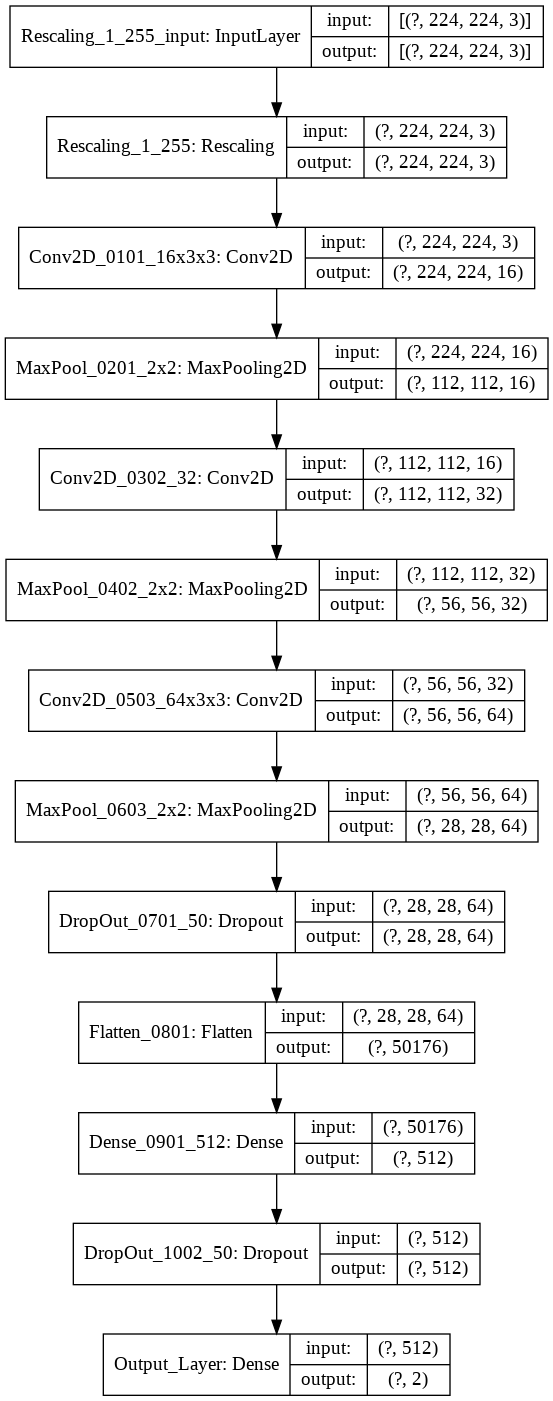

In [3]:
# To Plot Model ---
from tensorflow.keras.utils import plot_model

# Save Model Image to Google Drive 
%cd /content/drive/My Drive/Colab Notebooks/conference_paper/images
plot_model(s_model,to_file='keras_CC_2_v1.png',show_shapes=True,show_layer_names=True,rankdir='TB',
           expand_nested=False,dpi=480)
%cd /content
# See Model
plot_model(s_model,to_file='keras_CC_2_v1.png',show_shapes=True,show_layer_names=True,rankdir='TB',
           expand_nested=False,dpi=96)

# Plot Traning Graphs

In [ ]:
from os import listdir
from os.path import join
from glob import glob
import pandas as pd


p_directory = r'/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result'

all_HistoryDictionary = {}

for modelType in listdir(p_directory):
  all_HistoryDictionary[modelType] = listdir(join(p_directory,modelType))

del modelType
#all_HistoryDictionary

In [ ]:
#from matplotlib import pyplot as plt

#plt.figure(figsize=(15,10))
#for model in all_HistoryDictionary.keys():
  #plt.plot(all_HistoryDictionary[model]['sparse_categorical_accuracy'].index,all_HistoryDictionary[model]['sparse_categorical_accuracy'].values,
           #label='Accuracy_'+'_'.join(model.split('_')[-2:]),marker='.')
#plt.grid(),plt.ylabel('Accuracy'),plt.xlabel('Epochs'),plt.title('Sparse Categorical Accuracy'),plt.legend(loc='lower right')
#plt.show()

**Plot Accuracy Graph ---**

In [ ]:
import plotly.graph_objects as go
# Source: https://plotly.com/python/line-charts/#style-line-plots

# Create traces
foo_figure = go.Figure(data=None,layout=None,frames=None,skip_invalid=False)

for model in all_HistoryDictionary.keys():
  %cd {join(p_directory,model)}
  foo_figure.add_trace(go.Scatter(x=pd.read_csv(glob('*.csv')[0])['accuracy'].index,
                                  y=pd.read_csv(glob('*.csv')[0])['accuracy'].values,
                                  mode='lines+markers',
                                  name='Accuracy_'+model.split('_')[-1]))
  
# Source: https://plotly.com/python/figure-labels/#manual-labelling-with-graph-objects
# xanchor --> ['auto', 'left', 'center', 'right']
# yanchor --> ['auto', 'top', 'middle', 'bottom']
# Size Source: https://plotly.com/python/setting-graph-size/
# width = x-axis, height = y-axis, eg: autosize=False, width=700, height=700.
foo_figure.update_layout(title={'text':'Sample Model Accuracy','xanchor': 'auto', 'yanchor': 'auto', 'x': 0.5},
                         xaxis_title='Epochs', yaxis_title='Accuracy', autosize=False, width=1200, height=600, 
                         plot_bgcolor='#fff')
# Source: https://plotly.com/python/axes/#styling-and-coloring-axes-and-the-zeroline
# Source: https://plotly.com/python/axes/#styling-grid-lines
foo_figure.update_xaxes(showline=True, linewidth=2, linecolor='black', showgrid=True, gridwidth=1, gridcolor='ghostwhite')
foo_figure.update_yaxes(showline=True, linewidth=2, linecolor='red', showgrid=True, gridwidth=1, gridcolor='ghostwhite')

%cd /content/drive/My Drive/Colab Notebooks/conference_paper/images
foo_figure.write_html('accuracy.html')
%cd /content
foo_figure.show()

/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_gpu
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_cpu
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_tpu
/content/drive/My Drive/Colab Notebooks/conference_paper/images
/content


**Plot Validation Accuracy Graph ---**

In [ ]:
# Create traces
foo_figure = go.Figure(data=None, layout=None, frames=None, skip_invalid=False)

for model in all_HistoryDictionary.keys():
  %cd {join(p_directory,model)}
  foo_figure.add_trace(go.Scatter(x=pd.read_csv(glob('*.csv')[0])['val_accuracy'].index,
                                  y=pd.read_csv(glob('*.csv')[0])['val_accuracy'].values,
                                  mode='lines+markers',
                                  name='val_acc_'+model.split('_')[-1]))
  
foo_figure.update_layout(title={'text':'Sample Model Validation Accuracy','xanchor': 'auto', 'yanchor': 'auto', 'x': 0.5},
                         xaxis_title='Epochs', yaxis_title='Accuracy', autosize=False, width=1200, height=600, 
                         plot_bgcolor='#fff')
# Source: https://plotly.com/python/axes/#styling-and-coloring-axes-and-the-zeroline
# Source: https://plotly.com/python/axes/#styling-grid-lines
foo_figure.update_xaxes(showline=True, linewidth=2, linecolor='black', showgrid=True, gridwidth=1, gridcolor='ghostwhite')
foo_figure.update_yaxes(showline=True, linewidth=2, linecolor='red', showgrid=True, gridwidth=1, gridcolor='ghostwhite')

%cd /content/drive/My Drive/Colab Notebooks/conference_paper/images
foo_figure.write_html('val_accuracy.html')
%cd /content
foo_figure.show()

/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_gpu
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_cpu
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_tpu
/content/drive/My Drive/Colab Notebooks/conference_paper/images
/content


**Plot Training Loss Graph ---**

In [ ]:
# Create traces
foo_figure = go.Figure(data=None, layout=None, frames=None, skip_invalid=False)

for model in all_HistoryDictionary.keys():
  %cd {join(p_directory,model)}
  foo_figure.add_trace(go.Scatter(x=pd.read_csv(glob('*.csv')[0])['loss'].index,
                                  y=pd.read_csv(glob('*.csv')[0])['loss'].values,
                                  mode='lines+markers',
                                  name='val_acc_'+model.split('_')[-1]))
  
foo_figure.update_layout(title={'text':'Sample Model Training Loss','xanchor': 'auto', 'yanchor': 'auto', 'x': 0.5},
                         xaxis_title='Epochs', yaxis_title='Loss', autosize=False, width=1200, height=600, 
                         plot_bgcolor='#fff')
# Source: https://plotly.com/python/axes/#styling-and-coloring-axes-and-the-zeroline
# Source: https://plotly.com/python/axes/#styling-grid-lines
foo_figure.update_xaxes(showline=True, linewidth=2, linecolor='black', showgrid=True, gridwidth=1, gridcolor='ghostwhite')
foo_figure.update_yaxes(showline=True, linewidth=2, linecolor='red', showgrid=True, gridwidth=1, gridcolor='ghostwhite')

%cd /content/drive/My Drive/Colab Notebooks/conference_paper/images
foo_figure.write_html('loss.html')
%cd /content
foo_figure.show()

/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_gpu
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_cpu
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_tpu
/content/drive/My Drive/Colab Notebooks/conference_paper/images
/content


**Plot Validation Loss Graph ---**

In [ ]:
# Create traces
foo_figure = go.Figure(data=None, layout=None, frames=None, skip_invalid=False)

for model in all_HistoryDictionary.keys():
  %cd {join(p_directory,model)}
  foo_figure.add_trace(go.Scatter(x=pd.read_csv(glob('*.csv')[0])['val_loss'].index,
                                  y=pd.read_csv(glob('*.csv')[0])['val_loss'].values,
                                  mode='lines+markers',
                                  name='val_acc_'+model.split('_')[-1]))
  
foo_figure.update_layout(title={'text':'Sample Model Validation Loss','xanchor': 'auto', 'yanchor': 'auto', 'x': 0.5},
                         xaxis_title='Epochs', yaxis_title='Loss', autosize=False, width=1200, height=600, 
                         plot_bgcolor='#fff')
# Source: https://plotly.com/python/axes/#styling-and-coloring-axes-and-the-zeroline
# Source: https://plotly.com/python/axes/#styling-grid-lines
foo_figure.update_xaxes(showline=True, linewidth=2, linecolor='black', showgrid=True, gridwidth=1, gridcolor='ghostwhite')
foo_figure.update_yaxes(showline=True, linewidth=2, linecolor='red', showgrid=True, gridwidth=1, gridcolor='ghostwhite')

%cd /content/drive/My Drive/Colab Notebooks/conference_paper/images
foo_figure.write_html('val_loss.html')
%cd /content
foo_figure.show()

/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_gpu
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_cpu
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_tpu
/content/drive/My Drive/Colab Notebooks/conference_paper/images
/content


In [ ]:
# Create traces
foo_figure = go.Figure(data=None, layout=None, frames=None, skip_invalid=False)

for model in all_HistoryDictionary.keys():
  %cd {join(p_directory,model)}
  foo_figure.add_trace(go.Scatter(x=pd.read_csv(glob('*.csv')[0])['lr'].index,
                                  y=pd.read_csv(glob('*.csv')[0])['lr'].values,
                                  mode='lines+markers',
                                  name='lr_'+model.split('_')[-1]))
  
foo_figure.update_layout(title={'text':'Learning Rate vs Epochs','xanchor': 'auto', 'yanchor': 'auto', 'x': 0.5},
                         xaxis_title='Epochs', yaxis_title='Learning Rate', autosize=False, width=1200, height=600, 
                         plot_bgcolor='#fff')
# Source: https://plotly.com/python/axes/#styling-and-coloring-axes-and-the-zeroline
# Source: https://plotly.com/python/axes/#styling-grid-lines
foo_figure.update_xaxes(showline=True, linewidth=2, linecolor='black', showgrid=True, gridwidth=1, gridcolor='ghostwhite')
foo_figure.update_yaxes(showline=True, linewidth=2, linecolor='red', showgrid=True, gridwidth=1, gridcolor='ghostwhite')

%cd /content/drive/My Drive/Colab Notebooks/conference_paper/images
foo_figure.write_html('learning_rate.html')
%cd /content
foo_figure.show()

/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_gpu
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_cpu
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_tpu
/content/drive/My Drive/Colab Notebooks/conference_paper/images
/content


# Test Data analysis ---

In [ ]:
from os import listdir
from os.path import join
from glob import glob
import pandas as pd, numpy as np


p_directory = r'/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result'

all_HistoryDictionary = {}

for modelType in listdir(p_directory):
  all_HistoryDictionary[modelType] = listdir(join(p_directory,modelType))

del modelType
#all_HistoryDictionary

**Load Modules ---**

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# Accuracy: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy
from tensorflow.keras.metrics import Accuracy

%cd /content/drive/My Drive/Colab Notebooks
# For AUC, Precision, Recall, Specificity and Sensitivity calculation of particular class
from __supporting_modules__.multiclass_metrics.classification_statistics import classification_metrics_calculator
# Source[AUC]: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC
# Source[Precision]: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall#precision
# Source[Recall]: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall#recall
# Source[Specificity]: https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Specificity
# Source[Sensitivity]: https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Sensitivity
print('Got:',classification_metrics_calculator)
%cd /content

/content/drive/My Drive/Colab Notebooks
Got: <function classification_metrics_calculator at 0x7fb2671e2e18>
/content


**Test Accuracy and Classification Metrics:**

In [ ]:
# Loss Calculator - Sparse Categorical Crossentropy Loss.
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
# Sparse Categorical Crossentropy Loss with y_pred is expected to be a logits tensor
sparse_cc_logits_loss_calculator = SparseCategoricalCrossentropy(from_logits=True,reduction='auto',
                                                                 name='sparse_categorical_crossentropy_with_logits')
# Sparse Categorical Crossentropy Loss simple
sparse_cc_loss_calculator = SparseCategoricalCrossentropy(from_logits=False,reduction='auto',name='sparse_categorical_crossentropy')
# Calculates how often predictions equals labels.
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy
accuracy_calculator = Accuracy(name='accuracy', dtype=None)


# Test Table Column Heading ... 
test_columns = ['model_type','sparse_cc_loss','sparse_cc_logits_loss','benign_accuracy','malignant_accuracy','avg_accuracy']
classification_metrics_columns = ['model_type','benign_auc','malignant_auc','avg_auc','benign_precision',
                                  'malignant_precision','avg_precision','benign_recall','malignant_recall','avg_recall',
                                  'benign_specificity','malignant_specificity','avg_specificity','benign_sensitivity',
                                  'malignant_sensitivity','avg_sensitivity']
# Total number of columns 
total_test_columns = len(test_columns)
total_clf_metrics_columns = len(classification_metrics_columns)
# Log Tabel for SGD 
test_table = pd.DataFrame(data=None,columns=test_columns)
classification_metrics = pd.DataFrame(data=None,columns=classification_metrics_columns)

working_index = 0
for modelType in all_HistoryDictionary.keys():

  %cd {join(p_directory,modelType)}
  # Print Model Type
  #print('Doing Calculation For:',condition)
  # Get all numpy arrays for a particular condition
  results = glob('*.npy')
  # Sort alphabetically all arrays
  results.sort()
  print(results)

  # Add empty row to table for Sample model in test table
  test_table.loc[working_index] = [None]*total_test_columns 
  # Add empty row to table for Sample model in classification metrics table
  classification_metrics.loc[working_index] = [None]*total_clf_metrics_columns 

  # Feching Data of Sample Model ---
  # True values for Simple Model
  y_true = np.load(results[1],mmap_mode=None,allow_pickle=False,fix_imports=True,encoding='ASCII')
  y_true = y_true.astype(np.int16)

  # Simple Model Predections 
  y_prediction =  np.load(results[-1],mmap_mode=None,allow_pickle=False,fix_imports=True,encoding='ASCII')
  
  # Separating label into base classes
  # Seperating benign class
  y_true_benign = y_true.copy()
  y_true_benign[y_true == 1] = -1
  y_true_benign[y_true_benign == 0] = 1
  y_true_benign[y_true_benign == -1] = 0
  # Seperating malignant class
  y_true_malignant = y_true.copy()

################################################################################

  # Adding data for Sample Model in test table ---
  test_table.loc[[working_index],['model_type']] = modelType
  test_table.loc[[working_index],['sparse_cc_logits_loss']] = sparse_cc_logits_loss_calculator(y_true,y_prediction,sample_weight=None).numpy()
  test_table.loc[[working_index],['sparse_cc_loss']] = sparse_cc_loss_calculator(y_true,y_prediction,sample_weight=None).numpy()

  # Calculate Accuracy for benign class for Sample Model in test table ---
  accuracy_calculator.update_state(y_true_benign,np.round(y_prediction[:,0]),sample_weight=None)
  test_table.loc[[working_index],['benign_accuracy']] = accuracy_calculator.result().numpy()
  accuracy_calculator.reset_states()
  # Calculate Accuracy for benign class for Sample Model in test table ---
  accuracy_calculator.update_state(y_true_malignant,np.round(y_prediction[:,1]),sample_weight=None)
  test_table.loc[[working_index],['malignant_accuracy']] = accuracy_calculator.result().numpy()
  accuracy_calculator.reset_states()
  test_table.loc[[working_index],['avg_accuracy']] = (test_table.loc[[working_index],['benign_accuracy']].values +
                                                      test_table.loc[[working_index],['malignant_accuracy']].values)/2

################################################################################

  # Adding data for Sample Model in classification metrics table ---
  classification_metrics.loc[[working_index],['model_type']] = modelType
  # Calculate AUC, Precision, Recall, Specificity and Sensitivity for benign class --
  result_dictionary_benign = classification_metrics_calculator(y_true_benign,y_prediction[:,0],sample_weight=None)
  classification_metrics.loc[[working_index],
                             ['benign_auc','benign_precision','benign_recall',
                              'benign_specificity','benign_sensitivity']] = [result_dictionary_benign['auc'],result_dictionary_benign['precision'],
                                                                             result_dictionary_benign['recall'],result_dictionary_benign['specificity'],
                                                                             result_dictionary_benign['sensitivity']]
  # Calculate AUC, Precision, Recall, Specificity and Sensitivity for malignant class --                                    
  result_dictionary_malignant = classification_metrics_calculator(y_true_malignant,y_prediction[:,1],sample_weight=None)
  classification_metrics.loc[[working_index],
                             ['malignant_auc','malignant_precision','malignant_recall',
                              'malignant_specificity','malignant_sensitivity']] = [result_dictionary_malignant['auc'],result_dictionary_malignant['precision'],
                                                                                   result_dictionary_malignant['recall'],result_dictionary_malignant['specificity'],
                                                                                   result_dictionary_malignant['sensitivity']]
  # Calculate average of all  
  classification_metrics.loc[[working_index],
                             ['avg_auc','avg_precision','avg_recall',
                              'avg_specificity','avg_sensitivity']] = [(result_dictionary_benign['auc']+result_dictionary_malignant['auc'])/2,
                                                                       (result_dictionary_benign['precision']+result_dictionary_malignant['precision'])/2,
                                                                       (result_dictionary_benign['recall']+result_dictionary_malignant['recall'])/2,
                                                                       (result_dictionary_benign['specificity']+result_dictionary_malignant['specificity'])/2,                                                  
                                                                       (result_dictionary_benign['sensitivity']+result_dictionary_malignant['sensitivity'])/2]

  working_index+=1

  # Cleanup variables of Sample Model --
  del y_true,y_prediction,y_true_benign,y_true_malignant,result_dictionary_benign,result_dictionary_malignant

del modelType,sparse_cc_logits_loss_calculator,sparse_cc_loss_calculator,accuracy_calculator,classification_metrics_calculator
del test_columns,classification_metrics_columns,total_test_columns,total_clf_metrics_columns,working_index

print('Test results: --')
test_table

/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_gpu
['sample_model_gpu_ground_truth_images.npy', 'sample_model_gpu_ground_truth_labels.npy', 'sample_model_gpu_prediction.npy']
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_cpu
['sample_model_cpu_ground_truth_images.npy', 'sample_model_cpu_ground_truth_labels.npy', 'sample_model_cpu_prediction.npy']
/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result/sample_model_tpu
['sample_model_tpu_ground_truth_images.npy', 'sample_model_tpu_ground_truth_labels.npy', 'sample_model_tpu_prediction.npy']
Test results: --


,model_type,sparse_cc_loss,sparse_cc_logits_loss,benign_accuracy,malignant_accuracy,avg_accuracy
0,sample_model_gpu,0.166274,0.370739,0.95186,0.95186,0.95186
1,sample_model_cpu,0.170001,0.378261,0.945295,0.945295,0.945295
2,sample_model_tpu,0.16216,0.379695,0.949672,0.949672,0.949672


**Model Statistics --**

In [ ]:
print('Test Statistics : -')
test_table.iloc[:,1:].astype(float,copy=True).describe().loc[['count','mean','std','min','max']]

Test Statistics : -


,sparse_cc_loss,sparse_cc_logits_loss,benign_accuracy,malignant_accuracy,avg_accuracy
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.166145,0.376232,0.948942,0.948942,0.948942
std,0.003922,0.004811,0.003343,0.003343,0.003343
min,0.162160,0.370739,0.945295,0.945295,0.945295
max,0.170001,0.379695,0.951860,0.951860,0.951860


**Model Classification Statistics --**

In [ ]:
print('Model classification Statistics - ')
classification_metrics.loc[:,['model_type','avg_auc','avg_precision','avg_recall','avg_specificity','avg_sensitivity']]

Model classification Statistics - 


,model_type,avg_auc,avg_precision,avg_recall,avg_specificity,avg_sensitivity
0,sample_model_gpu,0.978849,0.925434,0.926334,0.926334,0.926334
1,sample_model_cpu,0.976767,0.914167,0.914745,0.914745,0.914745
2,sample_model_tpu,0.980135,0.911741,0.912533,0.912533,0.912533
